In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
import matplotlib.font_manager as fm

In [6]:
# NanumGothic 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


# 데이터 불러오기

In [15]:
df_21 = pd.read_csv('/content/2021.csv')
df_22 = pd.read_csv('/content/2022.csv')
df_23 = pd.read_csv('/content/2023.csv')

# 팀 분석용 테이블 제작

In [ ]:
# 라운드별로 데이터를 변환하여 새로운 데이터프레임 생성
# data : foot table (df_21, df_22, df_23)

def team(data):
  new_columns = [
    '라운드', '소속', '상대팀',
    'LB 이름', 'LB 선호발', 'LB 정발 여부',
    'RB 이름', 'RB 선호발', 'RB 정발 여부',
    'CB1 이름', 'CB1 선호발', 'CB1 정발 여부',
    'CB2 이름', 'CB2 선호발', 'CB2 정발 여부'
    ]

  transformed_data = []


  for team_info in data['소속'].unique():# 배열 [울산, 서울, 수원...]
    team_df = data[data['소속'] == team_info]
    for round_info in team_df['라운드'].unique(): # 배열 [1R, 2R, 3R...]
        round_df = team_df[team_df['라운드'] == round_info]
        row = {'라운드': round_df['라운드'].values[0], '소속': round_df['소속'].values[0], '상대팀': round_df['상대팀_x'].values[0]}

        for position in ['LB', 'RB', 'CB1', 'CB2']:
            player_info = round_df[round_df['포지션 상세'] == position]

            if not player_info.empty:
                row[f'{position} 이름'] = player_info['선수명'].values[0]
                row[f'{position} 선호발'] = player_info['주발'].values[0]
                row[f'{position} 정발 여부'] = player_info['정발여부'].values[0]
            else:
                row[f'{position} 이름'] = ''
                row[f'{position} 선호발'] = ''
                row[f'{position} 정발 여부'] = ''

        transformed_data.append(row)

  transformed_df = pd.DataFrame(transformed_data, columns=new_columns)
  return transformed_df

team_df21 = team(df_21)
team_df22 = team(df_22)
team_df23 = team(df_23)

In [16]:
df = pd.concat([df_21, df_22, df_23], ignore_index=True)
df_3y = df[['선수명', '소속', '라운드','주발', '포지션 상세', '정발여부','득점', '도움', '슈팅', '유효슈팅', '블락된슈팅', '벗어난슈팅', 'PA내슈팅', 'PA외슈팅', '오프사이드', '프리킥', '코너킥', '스로인', '드리블시도', '드리블성공', '드리블성공%', '패스시도', '패스성공', '패스성공%', '키패스', '전방패스시도', '전방패스성공', '전방패스성공%', '후방패스시도', '후방패스성공', '후방패스성공%', '횡패스시도', '횡패스성공', '횡패스성공%', '공격진영패스시도', '공격진영패스성공', '공격진영패스성공%', '수비진영패스시도', '수비진영패스성공', '수비진영패스성공%', '중앙진영패스시도', '중앙진영패스성공', '중앙진영패스성공%', '롱패스시도', '롱패스성공', '롱패스성공%', '중거리패스시도', '중거리패스성공', '중거리패스성공%', '단거리패스시도', '단거리패스성공', '단거리패스성공%', '크로스시도', '크로스성공', '크로스성공%', '탈압박', '지상경합시도', '지상경합성공', '지상경합성공%', '공중경합시도', '공중경합성공', '공중경합성공%', '태클시도', '태클성공', '태클성공%', '클리어링', '인터셉트', '차단', '획득', '블락', '볼미스', '파울' ]]

In [22]:
rb = df_3y[df_3y['포지션 상세']=='RB']
lb = df_3y[df_3y['포지션 상세']=='LB']
side = df_3y[(df_3y['포지션 상세']=='RB') | (df_3y['포지션 상세']=='LB')].reset_index()

In [23]:
side.to_csv('side_data.csv')

# 검정을 위한 EDA

* 수비를 비교할 지표
> '지상경합시도', '지상경합성공',  '공중경합시도', '공중경합성공', '태클시도', '태클성공', '클리어링', '인터셉트', '차단', '획득', '블락', '볼미스', '파울'

* 패스를 통한 공격 개입을 비교할 지표
>'패스시도', '패스성공',  '키패스', '전방패스시도', '전방패스성공', '후방패스시도', '후방패스성공', '횡패스시도', '횡패스성공', '공격진영패스시도', '공격진영패스성공',  '수비진영패스시도', '수비진영패스성공',  '중앙진영패스시도', '중앙진영패스성공',  '롱패스시도', '롱패스성공',  '중거리패스시도', '중거리패스성공',  '단거리패스시도', '단거리패스성공',  '크로스시도', '크로스성공'

* 패스 이외의 이벤트를 통한 공격 개입을 비교할 지표
>'득점', '도움', '슈팅', '유효슈팅', '블락된슈팅', '벗어난슈팅', 'PA내슈팅', 'PA외슈팅', '드리블시도', '드리블성공'

In [5]:
side_df = pd.read_csv('/content/side.csv')
side_df.head()

,Unnamed: 0,선수명,소속,주발,포지션 상세,정발여부,득점,도움,슈팅,유효슈팅,...,공중경합성공,태클시도,태클성공,클리어링,인터셉트,차단,획득,블락,볼미스,파울
0,0,설영우,울산,right,LB,정발x,0,0,0,0,...,2,1,0,4,1,6,7,1,0,1
1,1,김태환,울산,right,RB,정발,0,0,0,0,...,0,3,3,1,1,3,5,1,0,1
2,2,김태환,울산,right,RB,정발,0,0,0,0,...,1,0,0,0,2,5,10,1,1,2
3,3,설영우,울산,right,LB,정발x,0,0,1,0,...,1,1,0,4,1,10,9,2,1,2
4,4,홍철,울산,left,LB,정발,0,0,0,0,...,1,0,0,2,2,4,4,0,1,0


In [6]:
side = side_df[['선수명','소속','주발','포지션 상세','정발여부','득점', '도움', '슈팅', '유효슈팅', '블락된슈팅', '벗어난슈팅', 'PA내슈팅', 'PA외슈팅', '드리블시도', '드리블성공', '패스시도', '패스성공',  '키패스', '전방패스시도', '전방패스성공', '후방패스시도', '후방패스성공', '횡패스시도', '횡패스성공', '공격진영패스시도', '공격진영패스성공',  '수비진영패스시도', '수비진영패스성공',  '중앙진영패스시도', '중앙진영패스성공',  '롱패스시도', '롱패스성공',  '중거리패스시도', '중거리패스성공',  '단거리패스시도', '단거리패스성공',  '크로스시도', '크로스성공',  '탈압박', '지상경합시도', '지상경합성공',  '공중경합시도', '공중경합성공', '태클시도', '태클성공', '클리어링', '인터셉트', '차단', '획득', '블락', '볼미스', '파울']]

defence = side_df[['선수명','소속','주발','포지션 상세','정발여부','지상경합시도', '지상경합성공', '공중경합시도', '공중경합성공', '태클시도', '태클성공', '클리어링', '인터셉트', '차단', '획득', '블락', '볼미스', '파울']]
passing = side_df[['선수명','소속','주발','포지션 상세','정발여부','패스시도', '패스성공', '키패스', '전방패스시도', '전방패스성공', '후방패스시도', '후방패스성공', '횡패스시도', '횡패스성공', '공격진영패스시도', '공격진영패스성공', '수비진영패스시도', '수비진영패스성공', '중앙진영패스시도', '중앙진영패스성공', '롱패스시도', '롱패스성공', '중거리패스시도', '중거리패스성공', '단거리패스시도', '단거리패스성공', '크로스시도', '크로스성공']]
other = side_df[['선수명','소속','주발','포지션 상세','정발여부','득점', '도움', '슈팅', '유효슈팅', '블락된슈팅', '벗어난슈팅', 'PA내슈팅', 'PA외슈팅', '드리블시도', '드리블성공']]

# 기초 통계 시각화

In [64]:
def deviation_std_vis(data, foot, category):
  if foot == 'o':
    data = data[data['정발여부']=='정발']
  else:
    data = data[data['정발여부']!='정발']

  if category == 'pass':
    data = data[['선수명','소속','주발','포지션 상세','정발여부','패스시도', '패스성공', '키패스', '전방패스시도', '전방패스성공', '후방패스시도', '후방패스성공', '횡패스시도', '횡패스성공', '공격진영패스시도', '공격진영패스성공', '수비진영패스시도', '수비진영패스성공', '중앙진영패스시도', '중앙진영패스성공', '롱패스시도', '롱패스성공', '중거리패스시도', '중거리패스성공', '단거리패스시도', '단거리패스성공', '크로스시도', '크로스성공']]
  elif category == 'defence':
    data = defence = data[['선수명','소속','주발','포지션 상세','정발여부','지상경합시도', '지상경합성공', '공중경합시도', '공중경합성공', '태클시도', '태클성공', '클리어링', '인터셉트', '차단', '획득', '블락', '볼미스', '파울']]
  else: # other
    data = other = data[['선수명','소속','주발','포지션 상세','정발여부','득점', '도움', '슈팅', '유효슈팅', '블락된슈팅', '벗어난슈팅', 'PA내슈팅', 'PA외슈팅', '드리블시도', '드리블성공']]

  data = data.describe()
  means = data.loc['mean']
  stds = data.loc['std']


  plt.figure(figsize=(10, 6))
  if foot == 'o':
    bars = plt.bar(means.index, means.values, yerr=stds.values, capsize=5, color='skyblue', alpha=0.7)
  else:
    bars = plt.bar(means.index, means.values, yerr=stds.values, capsize=5, color='pink', alpha=0.7)
  plt.title(f"{category.upper()} Features Mean and Standard Deviation")
  plt.xlabel(f"{category} Features")
  plt.ylabel('Mean')
  plt.xticks(rotation=90)

  for bar, mean, std in zip(bars, means.values, stds.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{mean:.2f}\n±{std:.2f}',
             ha='center', va='bottom', fontsize=5, lotation=90)
  plt.show()


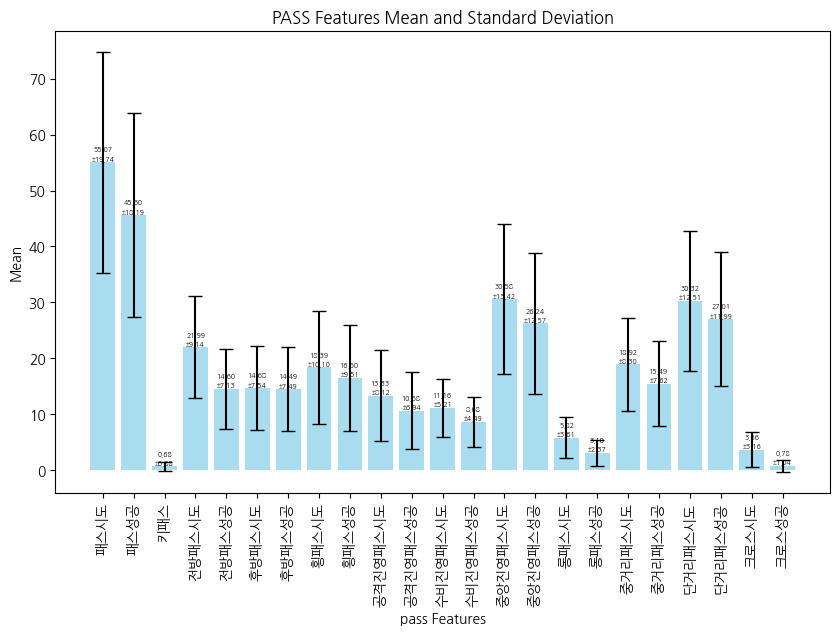

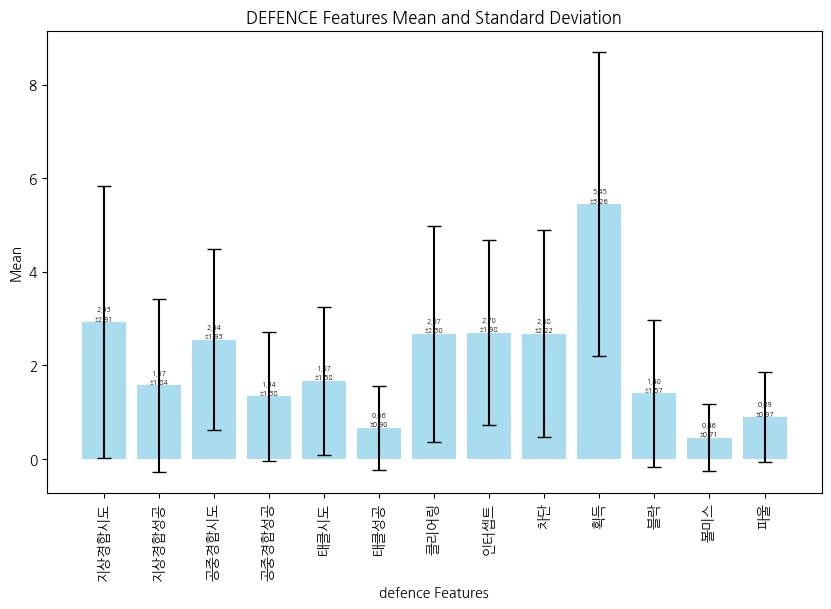

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


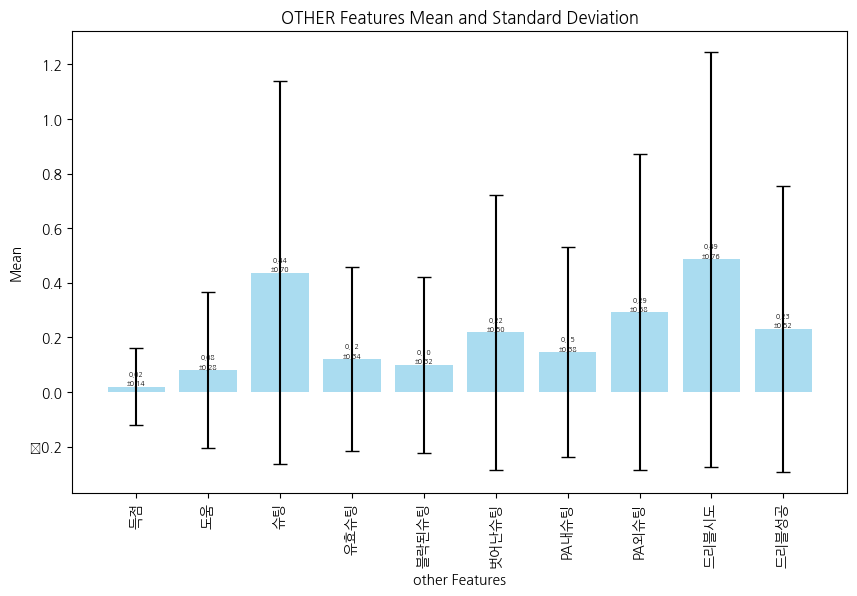

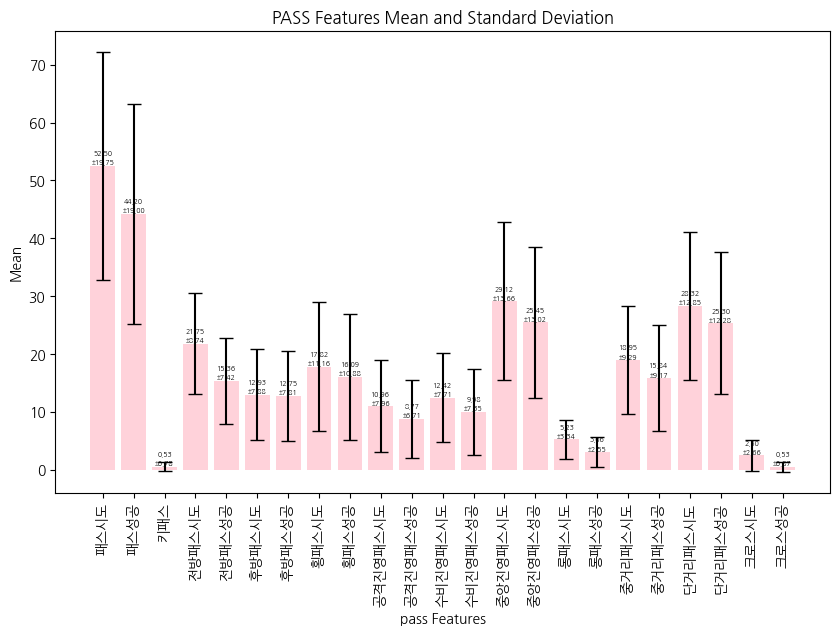

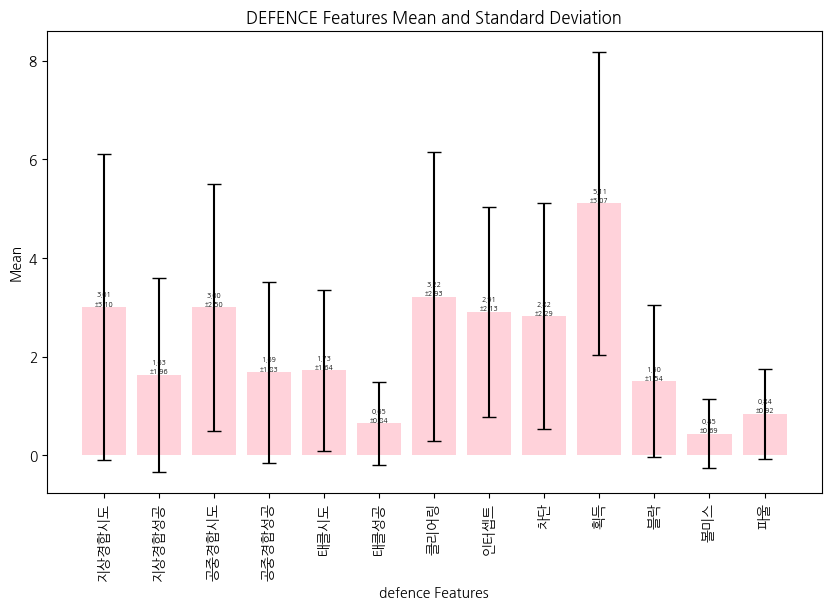

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


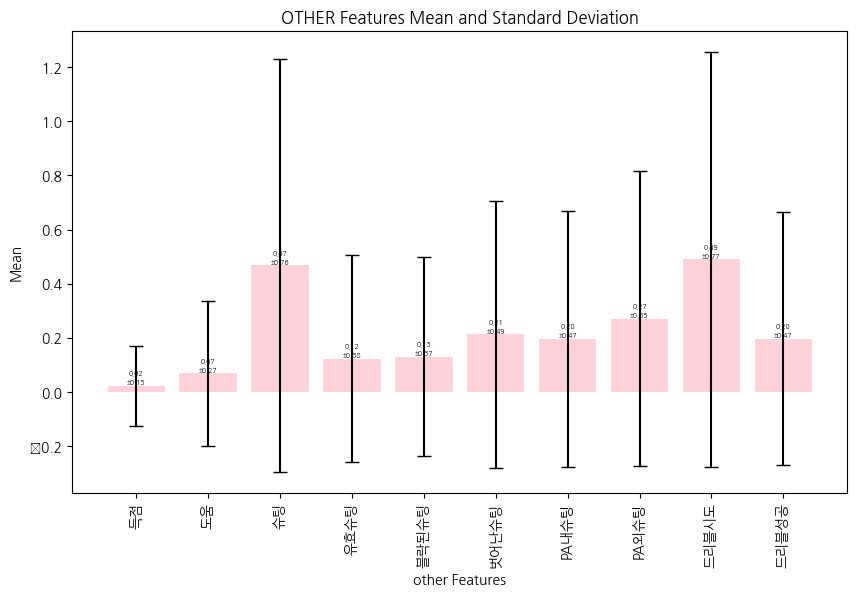

In [65]:
# 정발선수들의 카테고리 별 지표 시각화
o_pass = deviation_std_vis(side, 'o', 'pass')
o_defence = deviation_std_vis(side, 'o', 'defence')
o_other = deviation_std_vis(side, 'o', 'other')

# 정발이 아닌 선수들의 카테고리 별 지표 시각화
x_pass = deviation_std_vis(side, 'x', 'pass')
x_defence = deviation_std_vis(side, 'x', 'defence')
x_other = deviation_std_vis(side, 'x', 'other')

#정규성 검정


* Shapiro-Wilk

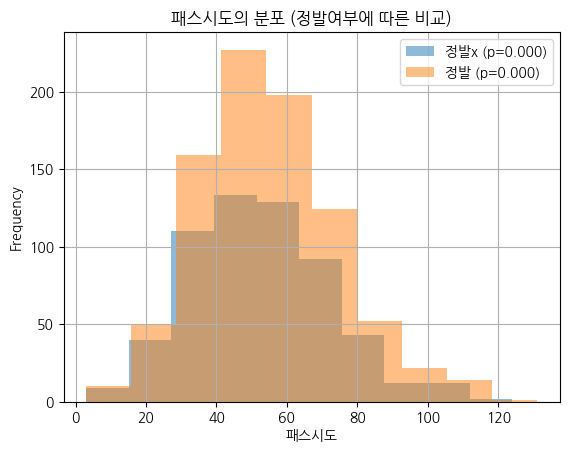

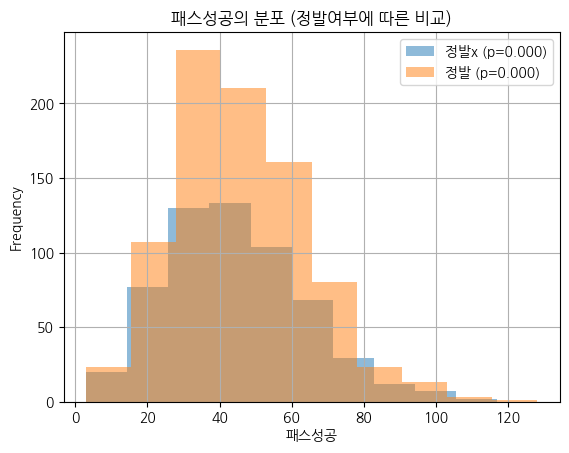

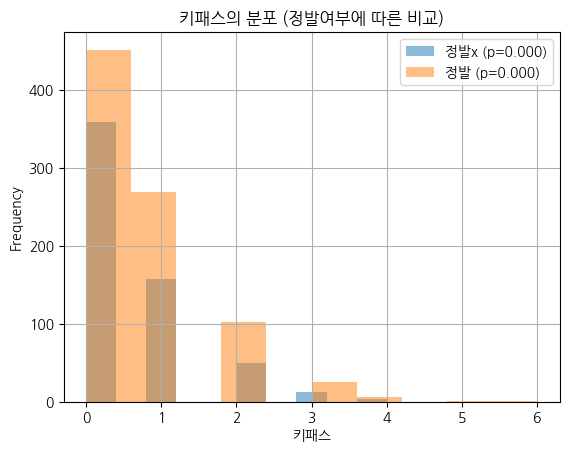

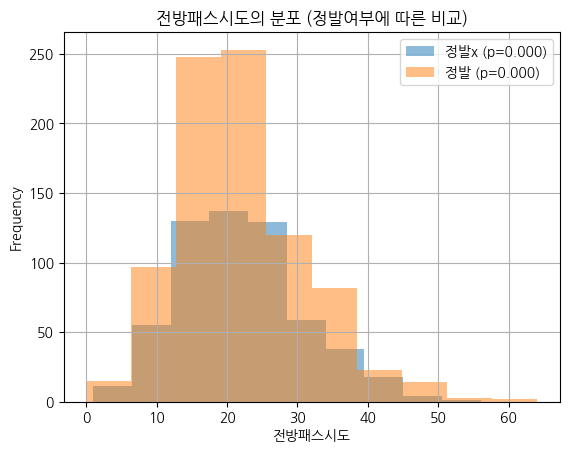

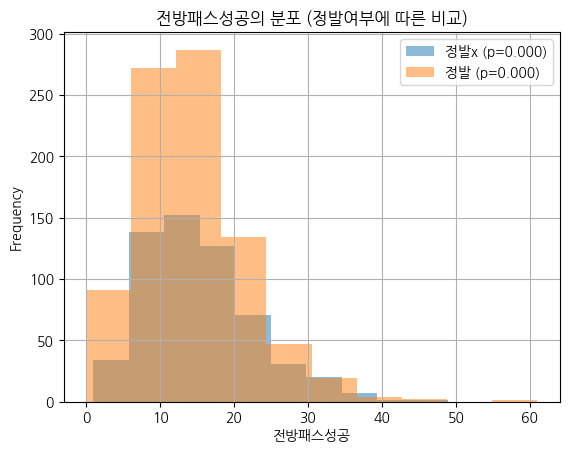

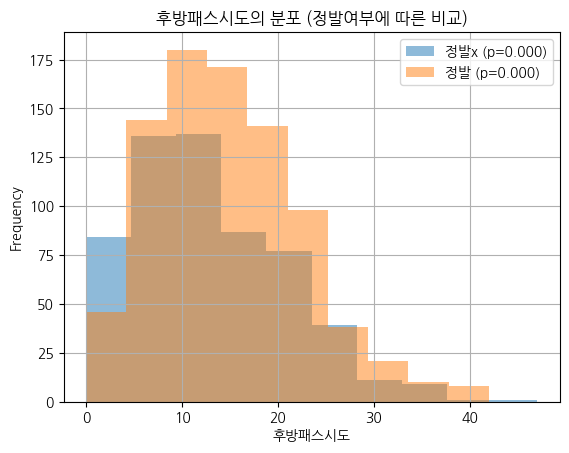

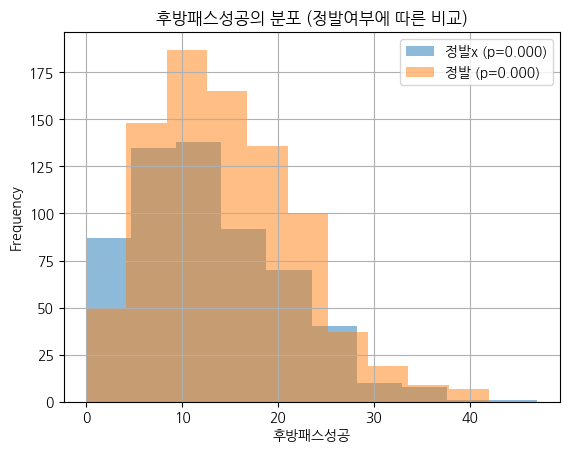

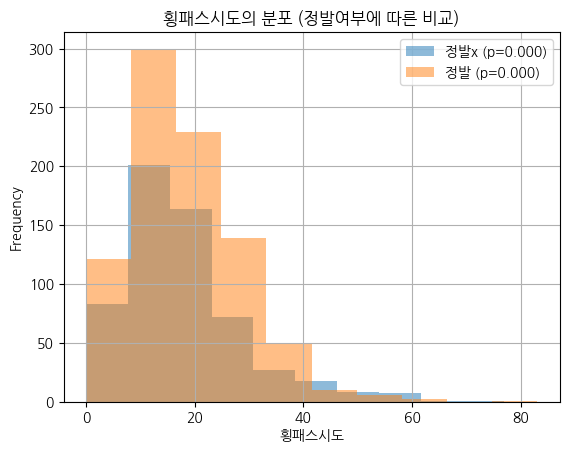

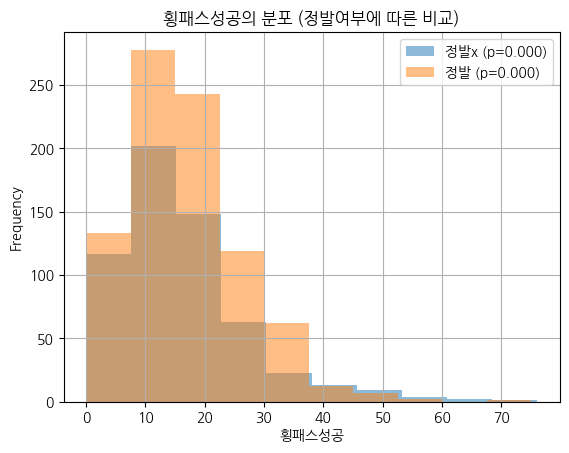

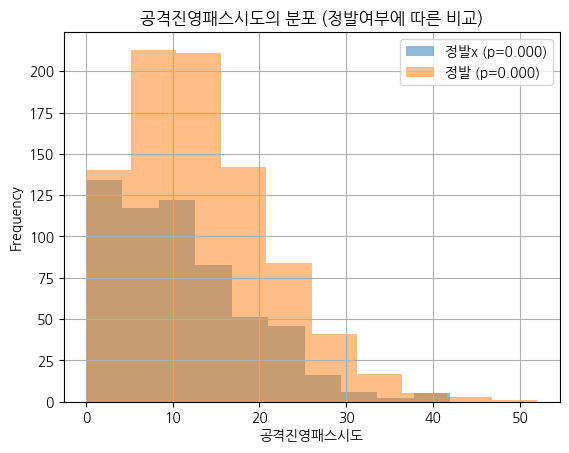

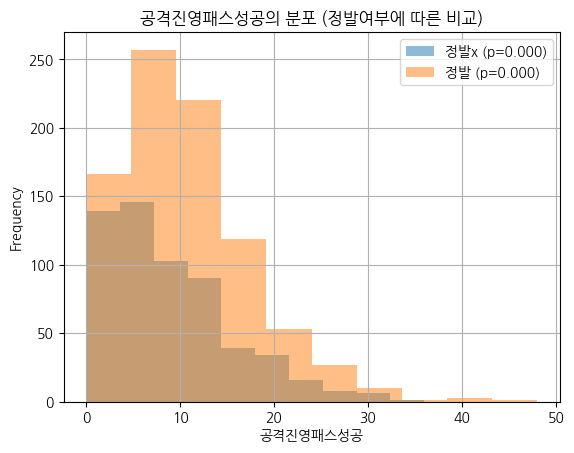

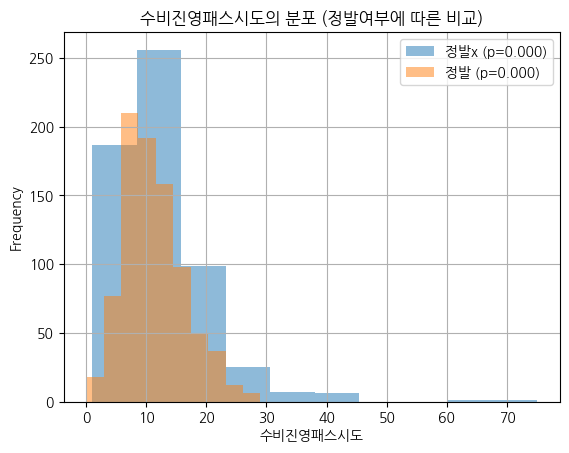

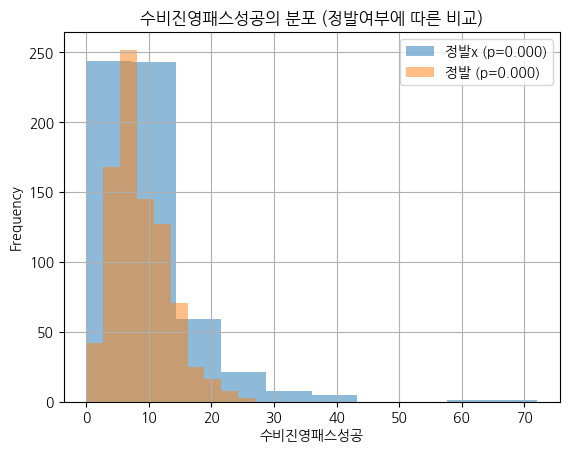

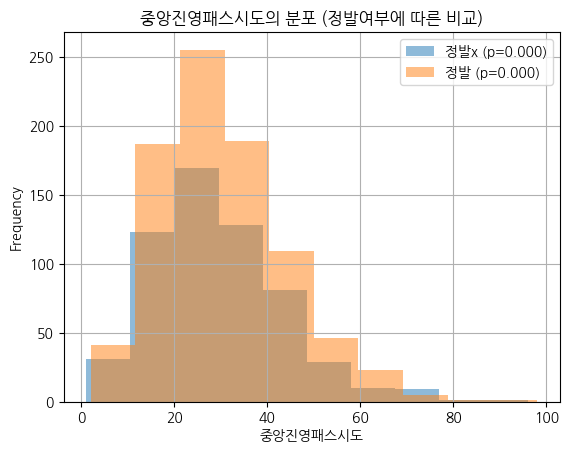

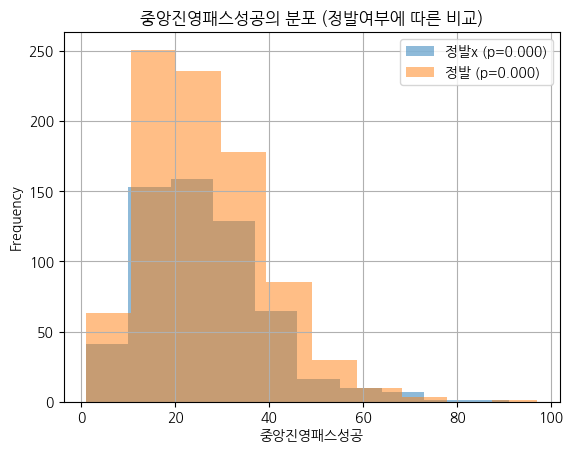

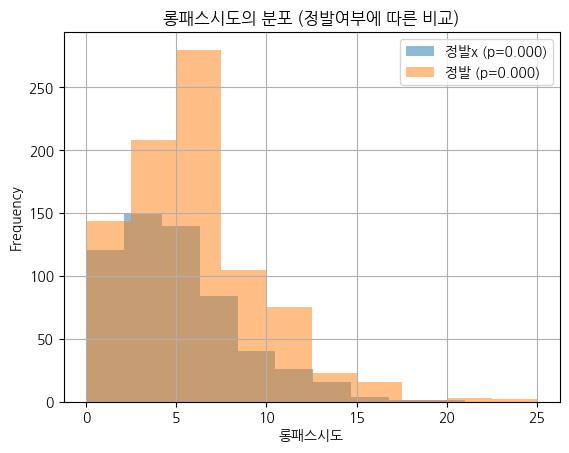

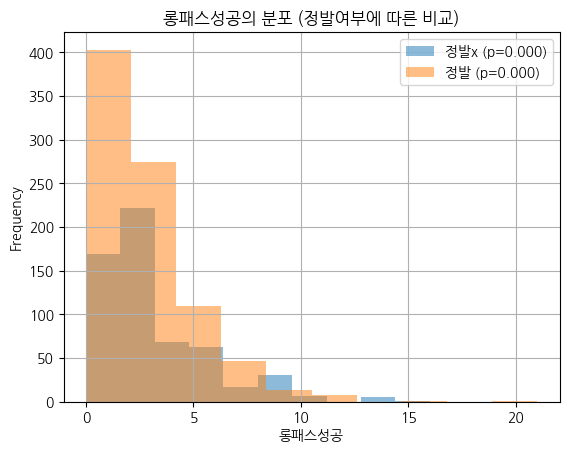

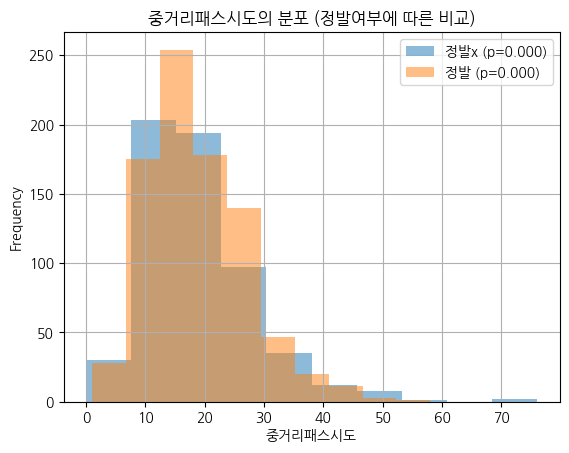

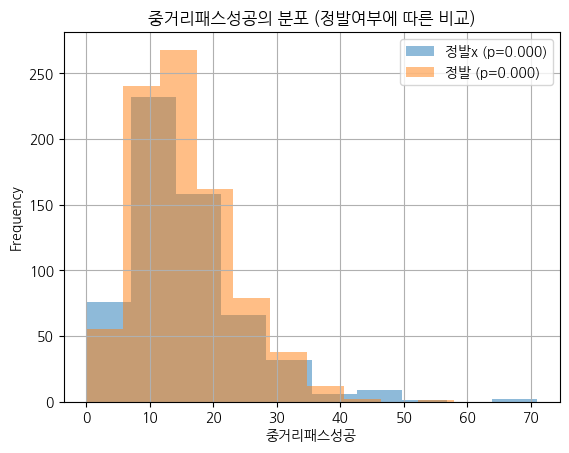

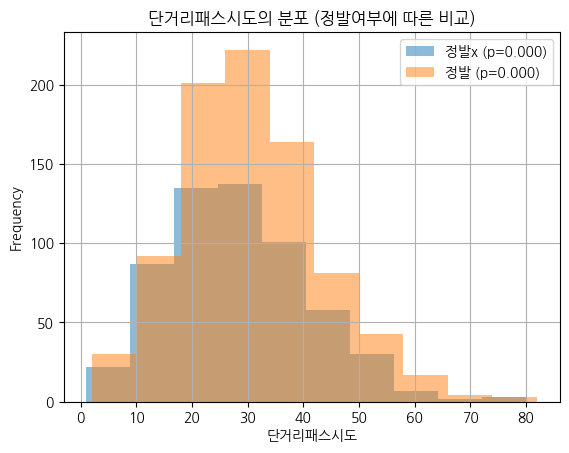

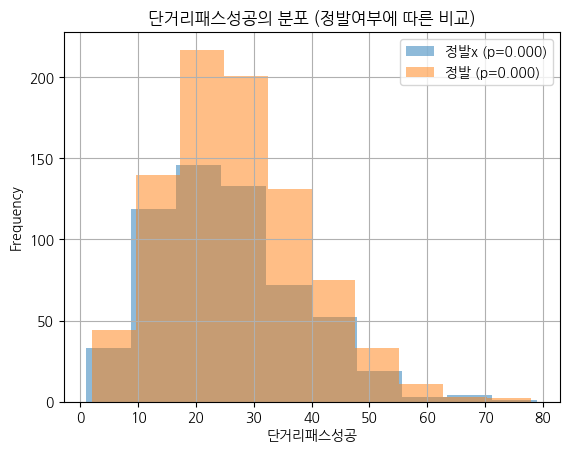

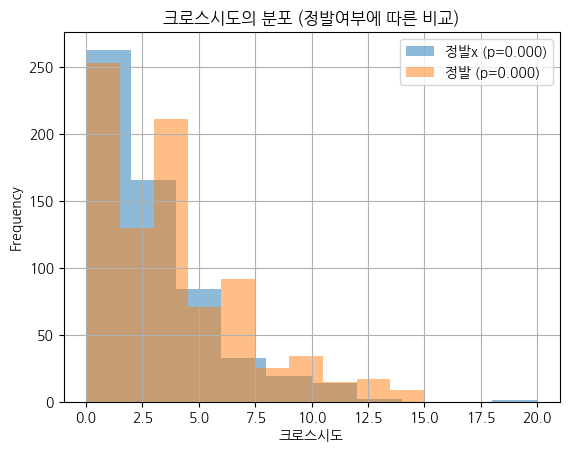

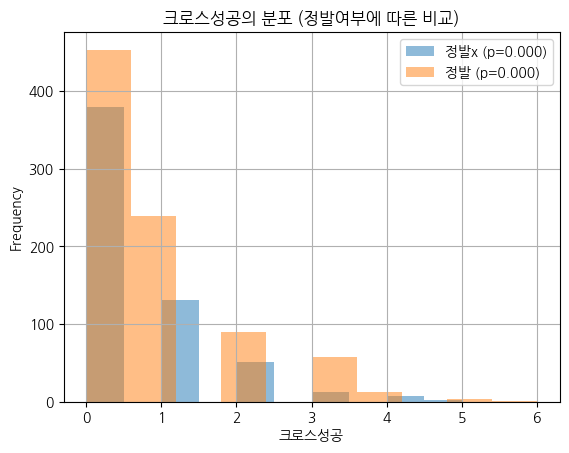

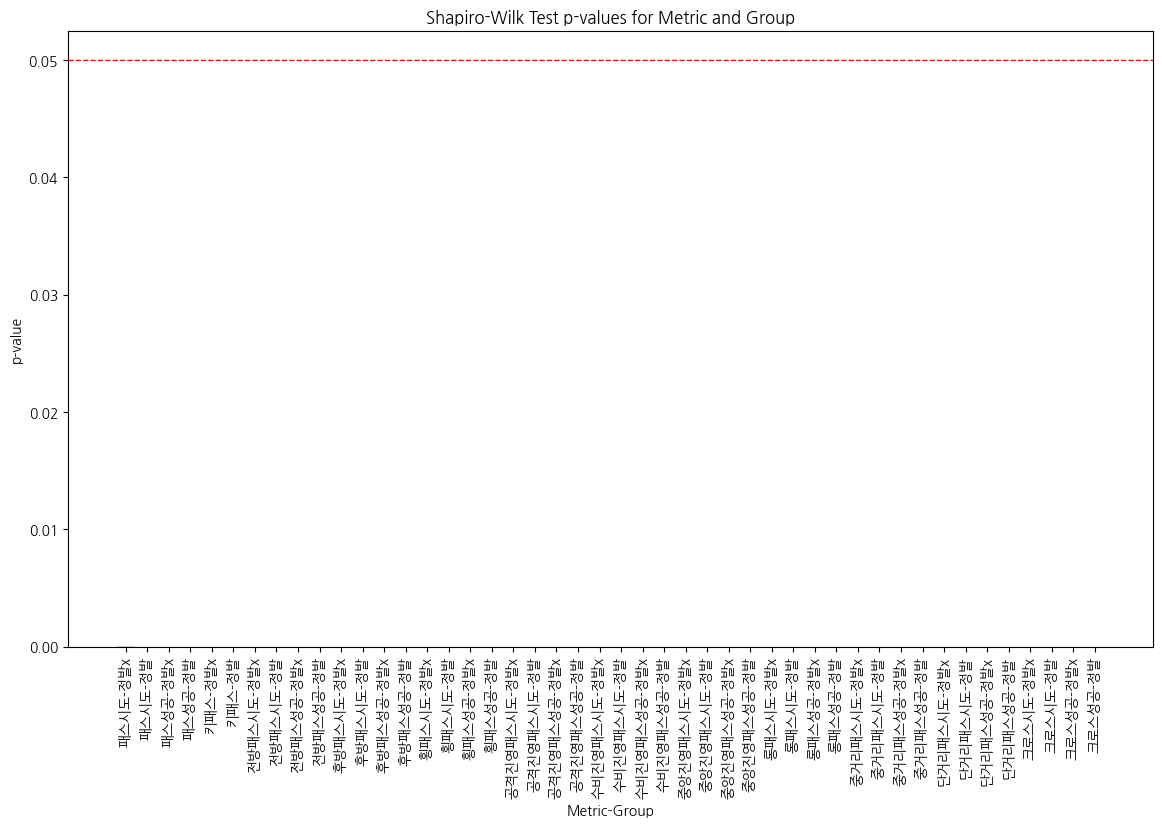

In [57]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import pandas as pd

# category : 'pass', 'defence', 'other'
def shapiro_test(data, category=None):
    if category == 'defence':
        data = data[['선수명','소속','주발','포지션 상세','정발여부','지상경합시도', '지상경합성공', '공중경합시도', '공중경합성공', '태클시도', '태클성공', '클리어링', '인터셉트', '차단', '획득', '블락', '볼미스', '파울']]
    elif category == 'pass':
        data = data[['선수명','소속','주발','포지션 상세','정발여부','패스시도', '패스성공', '키패스', '전방패스시도', '전방패스성공', '후방패스시도', '후방패스성공', '횡패스시도', '횡패스성공', '공격진영패스시도', '공격진영패스성공', '수비진영패스시도', '수비진영패스성공', '중앙진영패스시도', '중앙진영패스성공', '롱패스시도', '롱패스성공', '중거리패스시도', '중거리패스성공', '단거리패스시도', '단거리패스성공', '크로스시도', '크로스성공']]
    elif category == 'other':
        data = data[['선수명','소속','주발','포지션 상세','정발여부','득점', '도움', '슈팅', '유효슈팅', '블락된슈팅', '벗어난슈팅', 'PA내슈팅', 'PA외슈팅', '드리블시도', '드리블성공']]
    else:
        data = data

    # 성과 지표만 선택
    comparison_metrics = data.select_dtypes(include=['number']).columns

    groups = data['정발여부'].unique()

    normality_results = []

    for metric in comparison_metrics:
        plt.figure()

        for group in groups:
            group_data = data[data['정발여부'] == group][metric]

            # Shapiro-Wilk 정규성 검증
            stat, p_value = shapiro(group_data)
            normality_results.append({'Metric': metric, 'Group': group,'Statistic': round(stat, 6), 'p-value': round(p_value, 8)})

            group_data.hist(alpha=0.5, label=f'{group} (p={p_value:.3f})')

        plt.title(f'{metric}의 분포 (정발여부에 따른 비교)')
        plt.xlabel(metric)
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()

    return pd.DataFrame(normality_results)

def shapiro_vis(data):

  plt.figure(figsize=(14, 8))

  labels = [f"{row['Metric']}-{row['Group']}" for _, row in data.iterrows()]

  colors = ['crimson' if row['p-value'] > 0.05 else 'lightgrey' for _, row in data.iterrows()]

  plt.bar(labels, data['p-value'], color=colors)

  plt.xticks(rotation=90)

  plt.xlabel('Metric-Group')
  plt.ylabel('p-value')
  plt.title(f'Shapiro-Wilk Test p-values for Metric and Group')

  plt.axhline(y=0.05, color='r', linestyle='--', linewidth=1)
  plt.show()

pass_ = shapiro_test(side, category='pass')
pass_vis = shapiro_vis(pass_)


* 표본의 갯수 정발 n = 854, 정발X n = 582로 Shapiro-wilk는 부적합

* Kolmogorov-Smirnov

In [22]:
from scipy.stats import kstest, norm

numeric_columns = side.select_dtypes(include=['float64', 'int64']).columns

ks = []

# 정규성 검정 수행
for column in numeric_columns:
    for group in side['정발여부'].unique():
        group_data = side[side['정발여부'] == group][column].dropna()
        stat, p_value = kstest(group_data, 'norm', args=(group_data.mean(), group_data.std()))
        normality = '정규성 만족' if p_value > 0.05 else '정규성 불만족'
        ks.append({'정발여부': group, '지표': column, 'p-value': p_value, '정규성': normality})

ks_df = pd.DataFrame(ks)

ks_df

,정발여부,지표,p-value,정규성
0,정발x,득점,6.735976e-158,정규성 불만족
1,정발,득점,2.490930e-231,정규성 불만족
2,정발x,도움,3.923335e-157,정규성 불만족
3,정발,도움,4.457571e-229,정규성 불만족
4,정발x,슈팅,3.118342e-83,정규성 불만족
...,...,...,...,...
89,정발,블락,3.705000e-36,정규성 불만족
90,정발x,볼미스,3.331015e-81,정규성 불만족
91,정발,볼미스,7.781395e-114,정규성 불만족
92,정발x,파울,4.401030e-34,정규성 불만족


Text(0.5, 1.0, 'Kolmogorov-Smirnov 정규성 검정 결과')

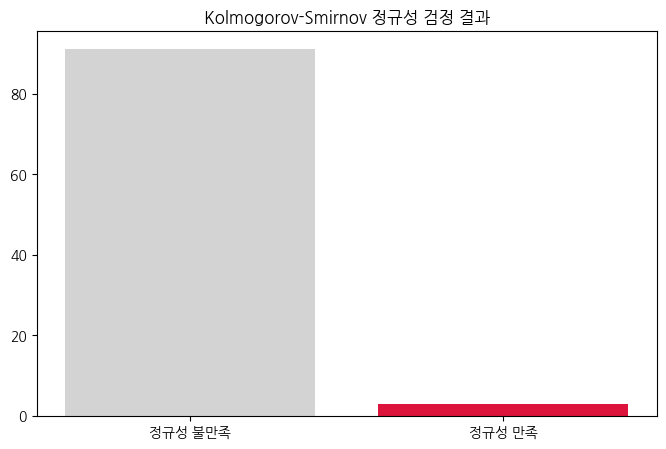

In [30]:
plt.figure(figsize=(8,5))

normality_counts = ks_df['정규성'].value_counts()

plt.bar(normality_counts.index, normality_counts.values, color=['lightgrey', 'crimson'])
plt.title('Kolmogorov-Smirnov 정규성 검정 결과')
plt.ylabel('')

* 정규성 검증 결과 지표의 대부분이 특정값에 분포되어 있어 정규성을 만족하지 못함
* 비모수 검정이 요구됨


# 비모수 검정(Mann-Whitney U)

# SPSS를 통해 비모수 검정(Mann-Whitney) 진행

In [7]:
# result : SPSS를 통해 도출된 비모수 검정 결과

result = pd.read_csv('/content/비모수 통계값.csv')
rb_result = pd.read_csv('/content/비모수 통계값(RB).csv')
lb_result = pd.read_csv('/content/비모수 통계값(LB).csv')

* 사이드백 전체

In [8]:
result

,지표,U value,표준오차,표준화된 검정 통계랑,p-value,평균순위(정발),평균순위(정발x),우위
0,스로인,288294.0,7713.012,5.044,0.001,765.40,653.15,정발x
1,패스시도,268137.5,7735.380,2.424,0.015,741.88,687.78,정발x
2,패스성공%,228404.0,7731.239,-2.714,0.007,695.52,756.05,정발
3,키패스,273754.0,6892.154,3.535,0.001,748.44,678.13,정발x
4,전방패스성공%,208779.0,7733.860,-5.251,0.001,672.62,789.77,정발
5,후방패스시도,284260.5,7729.906,4.512,0.001,760.69,660.08,정발x
6,후방패스성공,284420.5,7729.853,4.532,0.001,760.88,659.80,정발x
7,공격진영패스시도,294226.5,7730.042,5.801,0.001,772.32,642.96,정발x
8,공격진영패스성공,292242.0,7726.899,5.546,0.001,770.01,646.37,정발x
9,중앙진영패스시도,266369.0,7733.982,2.196,0.028,739.82,690.82,정발x


* 좌측 사이드백

In [9]:
lb_result

,지표,U value,표준오차,표준화된 검정 통계랑,p-value,평균순위(정발),평균순위(정발x),우위
0,프리킥,73115.0,2645.040,3.115,0.002,384.82,339.03,정발x
1,코너킥,79370.5,1950.071,7.433,0.001,402.89,322.35,정발x
2,패스시도,567168.0,2793.577,-2.902,0.004,337.57,382.62,정발
3,패스성공,55347.0,2793.537,-3.411,0.001,333.46,386.41,정발
4,패스성공%,54124.0,2792.121,-3.850,0.001,329.93,389.67,정발
5,키패스,75004.5,2514.614,4.028,0.001,390.28,333.99,정발x
6,전방패스성공,54730.0,2790.765,-3.635,0.001,331.68,388.05,정발
7,전방패스성공%,49320.5,2793.092,-5.569,0.001,316.04,402.48,정발
8,횡패스시도,54412.5,2791.994,-3.747,0.001,330.76,388.90,정발
9,횡패스성공,54573.5,2791.598,-3.690,0.001,331.23,388.47,정발


Text(0.5, 1.0, '지표별 평균순위 비교')

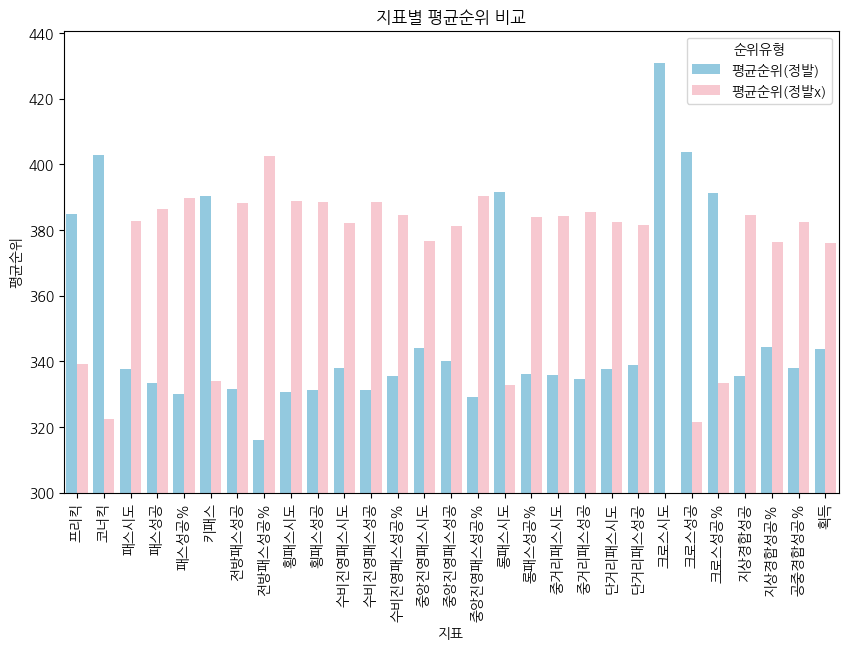

In [23]:
import seaborn as sns

# 데이터 프레임을 Long-form으로 변환
lb_result_long = pd.melt(lb_result, id_vars=['지표'], value_vars=['평균순위(정발)', '평균순위(정발x)'],
                         var_name='순위유형', value_name='평균순위')

plt.figure(figsize=(10, 6))
sns.barplot(x='지표', y='평균순위', hue='순위유형', data=lb_result_long, palette=['skyblue', 'pink'])
plt.xticks(rotation=90)
plt.ylim(300, lb_result_long['평균순위'].max() + 10)
plt.title('지표별 평균순위 비교')

* 우측 사이드백

In [24]:
rb_result

,지표,U value,표준오차,표준화된 검정 통계랑,p-value,평균순위(정발),평균순위(정발x),우위
0,PA외 슈팅,56107.0,1619.156,1.988,0.047,365.80,343.95,정발x
1,코너킥,46658.0,1079.228,-5.773,0.001,347.31,389.60,정발
2,스로인,67809.5,2510.538,5.943,0.001,388.70,287.42,정발x
3,패스시도,68642.0,2517.110,6.259,0.001,390.33,283.40,정발x
4,패스성공,67085.0,2517.105,5.640,0.001,387.28,290.92,정발x
5,후방패스시도,72188.0,2515.265,7.673,0.001,397.27,262.27,정발x
6,후방패스성공,72272.0,2515.235,7.706,0.001,397.43,265.86,정발x
7,횡패스시도,66881.0,2516.183,5.561,0.001,386.88,291.90,정발x
8,횡패스성공,66280.5,2516.042,5.323,0.001,385.71,294.80,정발x
9,공격진영패스시도,74730.0,2515.457,8.683,0.000,402.24,253.99,정발x


Text(0.5, 1.0, '지표별 평균순위 비교')

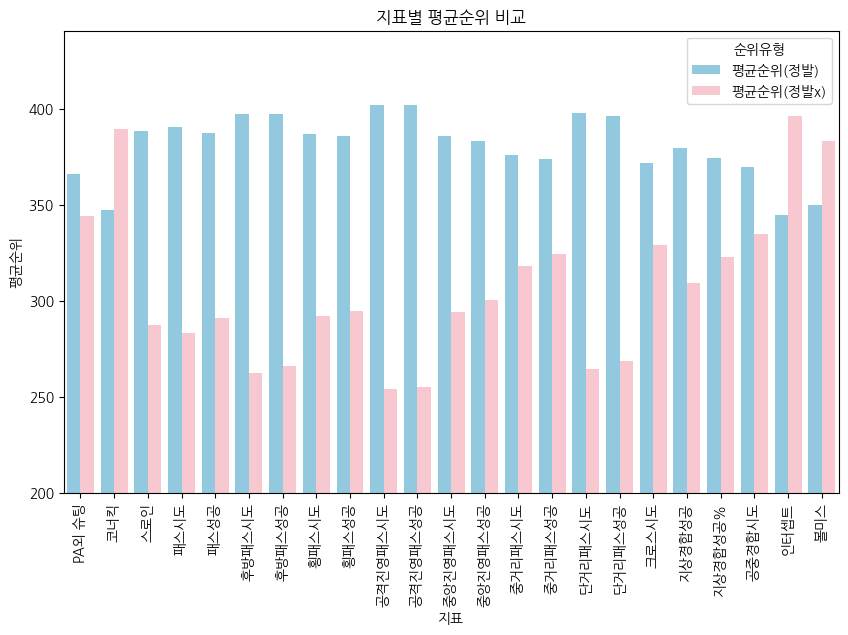

In [27]:
import seaborn as sns

# 데이터 프레임을 Long-form으로 변환
rb_result_long = pd.melt(rb_result, id_vars=['지표'], value_vars=['평균순위(정발)', '평균순위(정발x)'],
                         var_name='순위유형', value_name='평균순위')

plt.figure(figsize=(10, 6))
sns.barplot(x='지표', y='평균순위', hue='순위유형', data=rb_result_long, palette=['skyblue', 'pink'])
plt.xticks(rotation=90)
plt.ylim(200, lb_result_long['평균순위'].max() + 10)
plt.title('지표별 평균순위 비교')

# 플레이 양상의 차이가 나는 부분을 시각화